# Estimating cascade rates from advective structure functions

This example will guide you through each step necessary to estimate energy and enstrophy cascade rates from a 2D simulation of surface ocean velocity. 

General procedure: 
1. Load a dataset generated with GeophysicalFlows.jl
2. Format the dataset
3. Calculate velocity-based and scalar-based structure functions for the zonal and meridional directions as a function of separation distance
4. Estimate energy and enstrophy cascade rates from the structure functions
5. Plot the cascade rates in each direction as a function of separation distnace

#### Load the dataset generated with GeophysicalFlows.jl
We will use `h5py` to load a `.jld2` file, the output from `GeophysicalFlows.jl`, a numerical ocean simulator written in Julia.

In [18]:
import h5py
   
f = h5py.File('sample_data/2layer_128.jld2', 'r')
grid = f['grid']
snapshots = f['snapshots']

# Initialize the grid of x and y coordinates
x = grid['x']
y = grid['y']

# Grab the top layer and final snapshot of the simulation for u and v
u = snapshots['u']['20050'][0]
v = snapshots['v']['20050'][0]

Make a couple of quick plots to see the velocity fields.

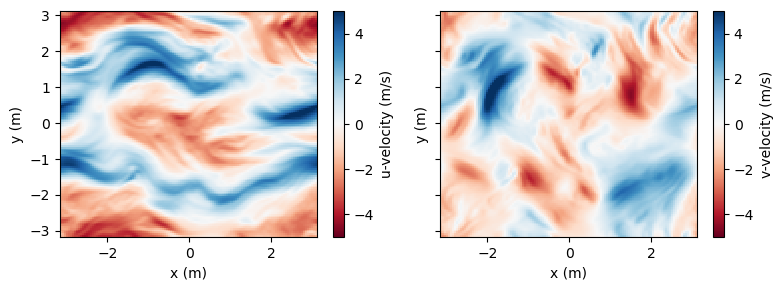

In [60]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,3))
p1 = ax1.pcolormesh(x,y,u, cmap='RdBu',vmin=-5,vmax=5)
p2 = ax2.pcolormesh(x,y,v, cmap='RdBu',vmin=-5,vmax=5)
fig.colorbar(p1,label='u-velocity (m/s)')
fig.colorbar(p2, label='v-velocity (m/s)')
ax1.set_xlabel('x (m)')
ax2.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax2.set_ylabel('y (m)')
plt.tight_layout()